#Predicting Heart Failure

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [ ]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools
from plotly import subplots

In [ ]:
heartData = pd.read_csv('/content/gdrive/MyDrive/IE0005Proj/heart.csv')
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Search for duplicate data lines and dropping them
duplicates = heartData[heartData.duplicated()] 
print("The number of duplicates is : " , len(duplicates))

The number of duplicates is :  0


In [ ]:
heartData.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#Data Exploration: Uni-Variate Data Analysis

In [ ]:
px.histogram(heartData, x="HeartDisease", color="HeartDisease").update_layout(bargap = 0.3)

In [ ]:
heartData['Sex'] = np.where(heartData['Sex'] == 'F', 'Female', 'Male')
heartData['HeartDisease'] = np.where(heartData['HeartDisease'] == 0, 'Normal', 'Heart Disease')
heartData["ChestPainType"].replace({'TA': 'Typical Angina', 'ATA': 'Atypical Angina', 'NAP': 'Non-Anginal Pain', 'ASY': 'Asymptomatic'}, inplace= True)
heartData["ST_Slope"].replace({'Up': 'Upsloping', 'Down': 'Downsloping',}, inplace= True)

In [ ]:
#Separating dataset into categorical and numerical
heartCatData = pd.DataFrame(heartData[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])
heartNumData = pd.DataFrame(heartData[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

In [ ]:
heartCatData = heartCatData.astype('category')
heartCatData.dtypes

Sex               category
ChestPainType     category
FastingBS         category
RestingECG        category
ExerciseAngina    category
ST_Slope          category
dtype: object

In [ ]:
fig = make_subplots(rows=7, cols=1)
count = 1

for var in heartCatData:
    fig.add_trace(go.Histogram(x=heartCatData[var], showlegend=False), row=[count], col=1) 
    fig.update_layout(bargap = 0.2)
    if count == 7:
      break
    count += 1    
 
fig.update_layout(height=1500, width=700)
#show visualizations
fig.show()

In [ ]:
heartNumData.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [ ]:
# Set up the subplots grid
fig = make_subplots(rows=5, cols=2)                    
colors = ["indianred", "lightseagreen", "lightskyblue", "grey", "mediumpurple"]
label = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
nbinsx1 = [50, 300, 700, 150, 100]

count = 1
i = 0
#create boxplot visualization of numeric columns
for x, var in enumerate(heartNumData):
    fig.add_trace(go.Box(x=heartNumData[var], marker_color=colors[i], name=label[i], showlegend=False), row=[count], col=1)
    
    # Get Histogram from plotly.graph_objs (go)
    fig.add_trace(go.Histogram(x = heartNumData[var], marker_color=colors[i], name=label[i],nbinsx = nbinsx1[x], histnorm = 'density'), row=[count], col=2)
    fig.update_layout(bargap = 0.3)
    
    count += 1
    i += 1

#config size
fig.update_layout(height=1500, width=1500)
#show visualizations
fig.show()

#Bi-Variate Data Analysis

In [ ]:
figures = []
for var in heartCatData:
  figures.append(px.histogram(heartCatData, x=heartData['HeartDisease'], color=var,  text_auto=True))
  if var == "ST_Slope":
    break

fig = make_subplots(rows=len(figures), cols=1)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)

fig.update_layout(height=1500, width=900)   
fig.show()

In [ ]:
# Define colors for the box plots
colors = ["indianred", "lightseagreen", "lightskyblue", "grey"]

figures = []

for i, var in enumerate(heartNumData):
    figures.append(px.box(heartNumData, x=var, y=heartData['HeartDisease'], color_discrete_sequence=[colors[i % len(colors)]], points='all'))

fig = make_subplots(rows=len(figures), cols=1)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)

fig.update_layout(height=1500, width=1000, title="Numerical Data w.r.t HeartDisease", showlegend=False)
fig.show()

In [ ]:
figures = []
nbins = [700, 210, 50, 700, 700]
for x, var in enumerate(heartNumData):
    figures.append(px.histogram(heartNumData, x=var  , color=heartData['HeartDisease'] , barmode='group', color_discrete_sequence= px.colors.qualitative.T10, nbins = nbins[x], opacity=0.8, height=500, width = 700))

fig = make_subplots(rows=len(figures), cols=1) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)

fig.update_layout(height=1500, width=1000, title = "Numerical Data w.r.t HeartDisease")      
fig.show()

## *Simplified Visualisation of Numeric Data*

*   Due to the high number of unique data points, it is hard to visualise and gain insights. Therefore, we decided to convert these numerical features into smaller groups (Categorical), for easier visualisation



In [ ]:
heartData['RestingBP_Group'] = [ int(i / 5) for i in heartData['RestingBP']]
heartData['Cholesterol_Group'] = [ int(i / 10) for i in heartData['Cholesterol']]
heartData['MaxHR_Group'] = [ int(i / 5) for i in heartData['MaxHR']]
heartData['Oldpeak_Group'] = [ int( (i*10) / 5) for i in heartData['Oldpeak']]

In [ ]:
figures = []
group_heartNumData = [i + '_Group' for i in heartNumData.iloc[:,[1,2,3,4]]]

for var in group_heartNumData:
    figures.append(px.histogram(heartData, x=var,color=heartData['HeartDisease'],color_discrete_sequence= px.colors.qualitative.T10,opacity=0.8,height=500, width = 700))
    
fig = make_subplots(rows=len(figures), cols=1) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)

fig.update_layout(height=1500, width=900, title = "Numerical Data w.r.t HeartDisease")      
fig.show()

# Conclusion

Catergorical Variables
*   Sex : Male > Female
*   ChestPainType : ASY > NAP > ATA > TA
*   FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
*   RestingECG : Normal > ST > LVH
*   ExerciseAngina : Angina > No Angina
*   ST_Slope : Flat > Up > Down

Numerical Variables
*   Age : 50+
*   RestingBP : 95 - 170
*   Cholesterol : 160 - 340
*   MaxHR : 70 - 180
*   Oldpeak : 0 - 4




# Chi-Square Test
#### Since our Response is a Categorical Type and we have find which Categorical Type Variables is a good predictor, we can either view it from the plots or we can come out with a numerical score that shows how correlated Response is to the other Categorical Type Variables
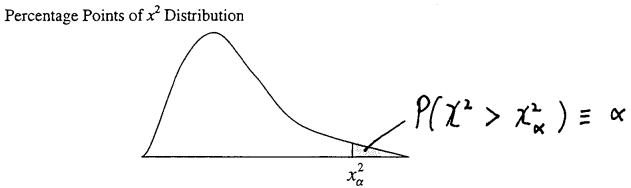
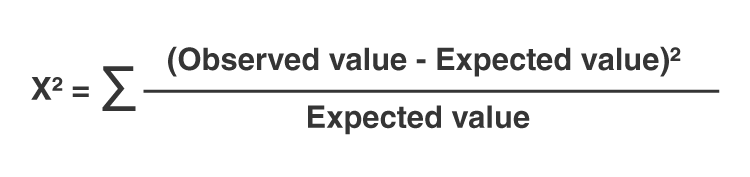
#### Null Hypothesis(H0): The two variables are NOT related to each other (Critical Value is 0.05)
#### Using the p-score, p-score > 0.05 (Null Hypothesis is accepted, two variables are not related), p-score < 0.05 (Null Hypothesis is rejected, two variables are related) 



In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
heartDisease = pd.Series(heartData['HeartDisease'])
df = pd.concat([heartCatData, heartDisease], axis = 1).reindex(heartCatData.index)
df.head() 

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,Male,Atypical Angina,0,Normal,N,Upsloping,Normal
1,Female,Non-Anginal Pain,0,Normal,N,Flat,Heart Disease
2,Male,Atypical Angina,0,ST,N,Upsloping,Normal
3,Female,Asymptomatic,0,Normal,Y,Flat,Heart Disease
4,Male,Non-Anginal Pain,0,Normal,N,Upsloping,Normal


In [ ]:
enc = OrdinalEncoder()
enc.fit(df[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']])

df[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']] = enc.transform(df[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']])

df.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,1.0,1.0,0.0,1.0,0.0,2.0,1.0
1,0.0,2.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,2.0,0.0,2.0,1.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,2.0,0.0,1.0,0.0,2.0,1.0


In [ ]:
X = df.iloc[:, 0:6]
y = df.iloc[:, -1]

In [ ]:
f_score = chi2(X,y)

p_values = pd.Series(f_score[1]).round(5)
p_values.index = X.columns
p_values

Sex               0.00002
ChestPainType     0.00000
FastingBS         0.00000
RestingECG        0.26973
ExerciseAngina    0.00000
ST_Slope          0.00000
dtype: float64

#### From the p-values, we can see that RestingECG p value > 0.05, thus RestingECG is not going to be used as our predictor

#  ANOVA Test aka Analysis of Variance
#### After finding Correlation of Categorical Variables vs Categorical Response, we now have to find the Correlation of Numerical Variables vs Categorical Response to pick the best Numerical Variable as predictor.

#### Null Hypothesis(H0): The two variables are NOT related to each other (Critical Value is 0.05)
#### Using the p-score, p-score > 0.05 (Null Hypothesis is accepted, two variables are not related), p-score < 0.05 (Null Hypothesis is rejected, two variables are related) 

 

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
X = heartNumData
y = df.iloc[:, -1]

In [ ]:
heartNumData.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [ ]:
ANOVA_score = f_classif(X,y)

In [ ]:
ANOVA_score

(array([ 79.16077949,  10.72722788,  52.45972492, 174.91358529,
        178.61512031]),
 array([3.00795324e-18, 1.09531459e-03, 9.30830888e-13, 1.13778598e-36,
        2.39077242e-37]))

In [ ]:
p_values = pd.Series(ANOVA_score[1]).round(5)
p_values.index = X.columns
p_values

Age            0.0000
RestingBP      0.0011
Cholesterol    0.0000
MaxHR          0.0000
Oldpeak        0.0000
dtype: float64

#### From the p values, we can see that all numerical variables are related to the Heart Disease (p<0.05). However, p value has a much higher value compared to the other numerical variable's p values. Also, with the box-plots (Numerical wrt HeartDisease), RestingBP box-plot does not have a clear distinction between Normal and Heart Disease. Therefore, to ensure higher accuracy, we will be leaving out the RestingBP and we will be using the other numerical variables as predictors.

# Standardisation and Normalisation
Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

Eg : Age = Years; FastingBS = mg / dl

1) Normalization: Oldpeak feature is normalized as it had displayed a right skewed data distribution.

2) Standardization: Age, RestingBP, Cholesterol and MaxHR features are scaled down because these features are normally distributed.

As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

heartData['Oldpeak'] = mms.fit_transform(heartData[['Oldpeak']])
heartData['Age'] = ss.fit_transform(heartData[['Age']])
heartData['RestingBP'] = ss.fit_transform(heartData[['RestingBP']])
heartData['Cholesterol'] = ss.fit_transform(heartData[['Cholesterol']])
heartData['MaxHR'] = ss.fit_transform(heartData[['MaxHR']])
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_Group,Cholesterol_Group,MaxHR_Group,Oldpeak_Group
0,-1.433140,Male,Atypical Angina,0.410909,0.825070,0,Normal,1.382928,N,0.295455,Upsloping,Normal,28,28,34,0
1,-0.478484,Female,Non-Anginal Pain,1.491752,-0.171961,0,Normal,0.754157,N,0.409091,Flat,Heart Disease,32,18,31,2
2,-1.751359,Male,Atypical Angina,-0.129513,0.770188,0,ST,-1.525138,N,0.295455,Upsloping,Normal,26,28,19,0
3,-0.584556,Female,Asymptomatic,0.302825,0.139040,0,Normal,-1.132156,Y,0.465909,Flat,Heart Disease,27,21,21,3
4,0.051881,Male,Non-Anginal Pain,0.951331,-0.034755,0,Normal,-0.581981,N,0.295455,Upsloping,Normal,30,19,24,0


In [ ]:
heartNumDataScale = pd.DataFrame(heartData[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
heartNumDataScale.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,-1.433140,0.410909,0.825070,1.382928,0.295455
1,-0.478484,1.491752,-0.171961,0.754157,0.409091
2,-1.751359,-0.129513,0.770188,-1.525138,0.295455
3,-0.584556,0.302825,0.139040,-1.132156,0.465909
4,0.051881,0.951331,-0.034755,-0.581981,0.295455


# Machine Learning - Logistic Regression
Since we have a binary target variable, we decided to use the supervised machine learning called logistic regression.

Applying the Sigmoid function on linear regression equation, it becomes the model of the logistic regression.

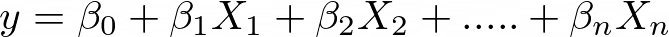

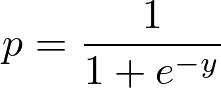

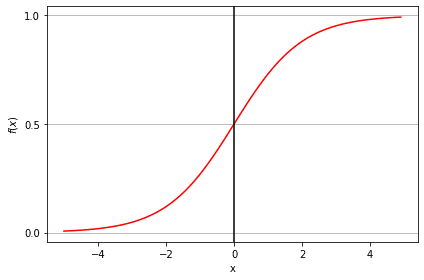

Unlike linear regression which uses a cost function called Residual Sum of Squares, Logistic Regression uses a cost function call the log loss:

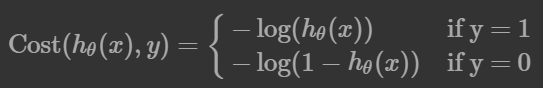

How it looks like as a plot:

cost-function-logistic-regression.svg

How it works: In the case of actual response = 1 and the predicted value = 0, the cost to pay is infinite.
The total cost (Error) is given as such:

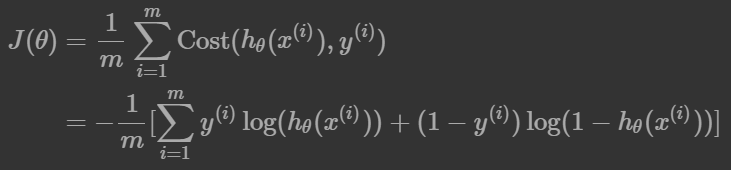

To minimize the cost function, we have to update parameter ***Beta*** as shown in the illustration.
 



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
heartData2 = pd.concat([df, heartNumDataScale], axis = 1).reindex(df.index)
heartData2.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,-1.433140,0.410909,0.825070,1.382928,0.295455
1,0.0,2.0,0.0,1.0,0.0,1.0,0.0,-0.478484,1.491752,-0.171961,0.754157,0.409091
2,1.0,1.0,0.0,2.0,0.0,2.0,1.0,-1.751359,-0.129513,0.770188,-1.525138,0.295455
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,-0.584556,0.302825,0.139040,-1.132156,0.465909
4,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.051881,0.951331,-0.034755,-0.581981,0.295455


In [ ]:
features = heartData2[heartData2.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = heartData2[['HeartDisease']].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 2)

print("Heart Disease Train Size:", y_train.shape)
print("Predictors Train Size:", x_train.shape)
print("Heart Disease Test Size:", y_test.shape)
print("Predictors Test Size:", x_test.shape)

Heart Disease Train Size: (642, 1)
Predictors Train Size: (642, 9)
Heart Disease Test Size: (276, 1)
Predictors Test Size: (276, 9)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(x_train,y_train.ravel())

y_pred = log_reg.predict(x_test)

y_train_pred = log_reg.score(x_train,y_train.ravel())
print('Accuracy for Train Dataset:', y_train_pred)

y_test_pred = log_reg.score(x_test, y_test.ravel())
print('Accuracy for Test Dataset:', y_test_pred)

Accuracy for Train Dataset: 0.8504672897196262
Accuracy for Test Dataset: 0.8659420289855072


AUC Score = 1 --> Perfect Classifier
AUC Score <= 0.5 --> Not Usable

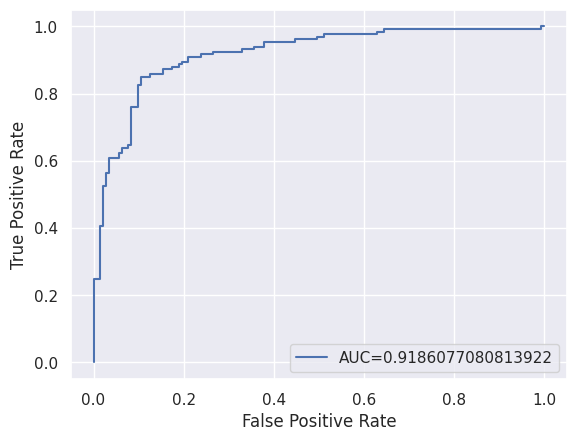

In [ ]:
#define metrics
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _  = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[125,  18],
       [ 19, 114]])

Text(0.5, 427.9555555555555, 'Predicted label')

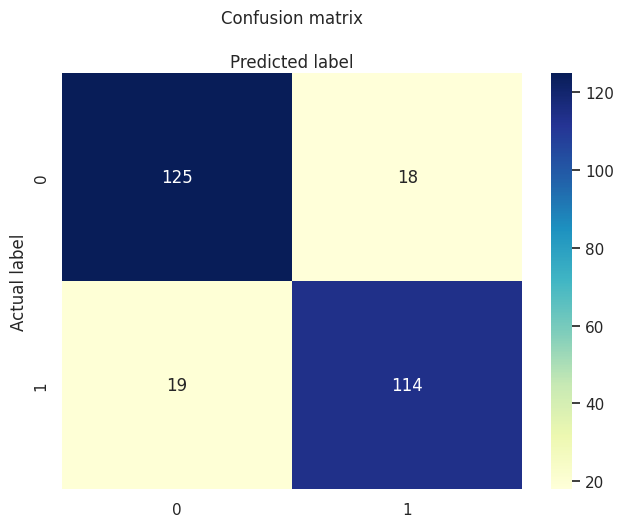

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Extra 
### Checking if replacing 0 Cholesterol with median value affects accuracy? 

In [ ]:
heartData = pd.read_csv('/content/gdrive/MyDrive/IE0005Proj/heart.csv')
heartData.shape

(918, 12)

In [ ]:
heartData['Cholesterol'].replace(to_replace = 0, value = 223 , inplace=True)
#heartData['RestingBP'].replace(to_replace = 0, value = 130 , inplace=True)
#heartData['RestingBP'].describe()
heartData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

heartData['Oldpeak'] = mms.fit_transform(heartData[['Oldpeak']])
heartData['Age'] = ss.fit_transform(heartData[['Age']])
heartData['RestingBP'] = ss.fit_transform(heartData[['RestingBP']])
heartData['Cholesterol'] = ss.fit_transform(heartData[['Cholesterol']])
heartData['MaxHR'] = ss.fit_transform(heartData[['MaxHR']])
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.897407,0,Normal,1.382928,N,0.295455,Up,0
1,-0.478484,F,NAP,1.491752,-1.122849,0,Normal,0.754157,N,0.409091,Flat,1
2,-1.751359,M,ATA,-0.129513,0.786200,0,ST,-1.525138,N,0.295455,Up,0
3,-0.584556,F,ASY,0.302825,-0.492677,0,Normal,-1.132156,Y,0.465909,Flat,1
4,0.051881,M,NAP,0.951331,-0.844832,0,Normal,-0.581981,N,0.295455,Up,0


In [ ]:
enc.fit(heartData[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']])

heartData[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']] = enc.transform(heartData[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']])

heartData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1.0,1.0,0.410909,0.897407,0.0,1.0,1.382928,0.0,0.295455,2.0,0.0
1,-0.478484,0.0,2.0,1.491752,-1.122849,0.0,1.0,0.754157,0.0,0.409091,1.0,1.0
2,-1.751359,1.0,1.0,-0.129513,0.786200,0.0,2.0,-1.525138,0.0,0.295455,2.0,0.0
3,-0.584556,0.0,0.0,0.302825,-0.492677,0.0,1.0,-1.132156,1.0,0.465909,1.0,1.0
4,0.051881,1.0,2.0,0.951331,-0.844832,0.0,1.0,-0.581981,0.0,0.295455,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1.0,3.0,-1.210356,0.434046,0.0,1.0,-0.188999,0.0,0.431818,1.0,1.0
914,1.536902,1.0,0.0,0.627078,-0.881901,1.0,1.0,0.164684,0.0,0.681818,1.0,1.0
915,0.370100,1.0,0.0,-0.129513,-2.031038,0.0,1.0,-0.857069,1.0,0.431818,1.0,1.0
916,0.370100,0.0,1.0,-0.129513,-0.084919,0.0,0.0,1.461525,0.0,0.295455,1.0,1.0


In [ ]:
features = heartData[heartData.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = heartData[['HeartDisease']].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 2)

print("Heart Disease Train Size:", y_train.shape)
print("Predictors Train Size:", x_train.shape)
print("Heart Disease Test Size:", y_test.shape)
print("Predictors Test Size:", x_test.shape)

Heart Disease Train Size: (642, 1)
Predictors Train Size: (642, 9)
Heart Disease Test Size: (276, 1)
Predictors Test Size: (276, 9)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0,
                            C = 10,
                            fit_intercept = True
                            ).fit(x_train,y_train.ravel())

y_pred = log_reg.predict(x_test)

y_train_pred = log_reg.score(x_train,y_train.ravel())
print('Accuracy for Train Dataset:', y_train_pred)

y_test_pred = log_reg.score(x_test, y_test.ravel())
print('Accuracy for Test Dataset:', y_test_pred)

Accuracy for Train Dataset: 0.8504672897196262
Accuracy for Test Dataset: 0.8514492753623188


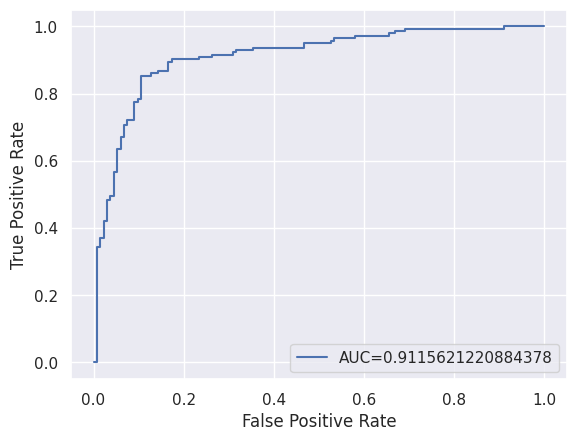

In [ ]:
#define metrics
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _  = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[111,  22],
       [ 19, 124]])

Text(0.5, 427.9555555555555, 'Predicted label')

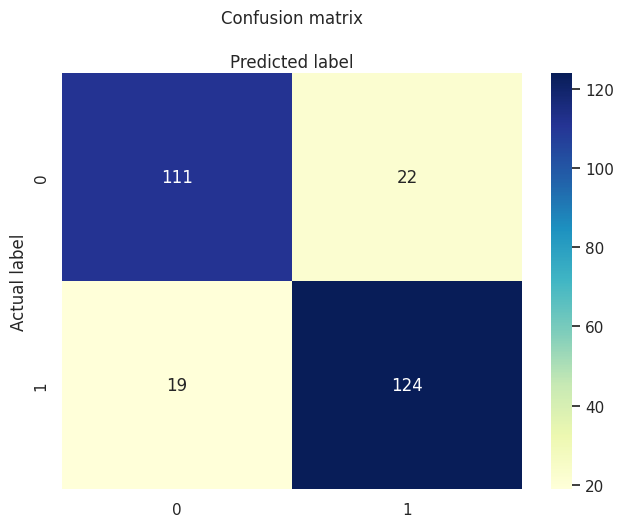

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Conclusion: No change in accuracy